In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join

## 데이터 로딩

In [2]:
DATA_NAME = "Gowalla"
FILE_NAME = "Gowalla_totalCheckins.txt"
COL_NAMES = ['user', 'time', 'lat', 'long', 'item']  # 초기 컬럼
BASE_DATA_RATIO = 7  # N/10
INC_RATIO = 3
INC_STEP = 5

# config
ROOT_PATH = os.path.abspath("")
DATA_PATH = join(ROOT_PATH + "\\dataset", DATA_NAME)
SAVE_PATH = DATA_PATH
FILE_PATH = join(DATA_PATH, FILE_NAME)
FILT_THRESHOLD = 10  # 최소 데이터 갯수
cols = ["user", "item", "time"]  # 사용할 컬럼

print(f"""
ROOT_PATH: {ROOT_PATH}
DATA_PATH: {DATA_PATH}
SAVE_PATH: {SAVE_PATH}
FILE_PATH: {FILE_PATH}
""")


ROOT_PATH: C:\tech\Study\KCC
DATA_PATH: C:\tech\Study\KCC\dataset\Gowalla
SAVE_PATH: C:\tech\Study\KCC\dataset\Gowalla
FILE_PATH: C:\tech\Study\KCC\dataset\Gowalla\Gowalla_totalCheckins.txt



In [3]:
def print_info(df):
    """
    그래프 정보 출력
    """
    print(f"Total Edges : {len(df)}\nTotal User : {len(df['user'].unique())}\nTotal item : {len(df['item'].unique())} \
                \nSmallest user id : {df['user'].unique().min()} \
                \nbiggest user id : {df['user'].unique().max()} \
                \nSmallest item id : {df['item'].unique().min()} \
                \nbiggest item id : {df['item'].unique().max()} \
                \nMin Interaction Per user : {df.user.value_counts().min()} \
                \nMax Interaction Per user : {df.user.value_counts().max()} \
                \nAvg Interaction Per user : {df.user.value_counts().mean()}\
                \nMin Interaction Per item : {df.item.value_counts().min()} \
                \nMax Interaction Per item : {df.item.value_counts().max()} \
                \nAvg Interaction Per item : {df.item.value_counts().mean()}")

In [4]:
# Load File
origin_df = pd.read_table(FILE_PATH, names=COL_NAMES)
print_info(origin_df)

Total Edges : 6442892
Total User : 107092
Total item : 1280969                 
Smallest user id : 0                 
biggest user id : 196585                 
Smallest item id : 8904                 
biggest item id : 5977757                 
Min Interaction Per user : 1                 
Max Interaction Per user : 2175                 
Avg Interaction Per user : 60.16221566503567                
Min Interaction Per item : 1                 
Max Interaction Per item : 5811                 
Avg Interaction Per item : 5.029701733609478


## 데이터 전처리

0. 필요 없는 컬럼 제거

In [5]:
clean_df = origin_df[cols]
clean_df

,user,item,time
0,0,22847,2010-10-19T23:55:27Z
1,0,420315,2010-10-18T22:17:43Z
2,0,316637,2010-10-17T23:42:03Z
3,0,16516,2010-10-17T19:26:05Z
4,0,5535878,2010-10-16T18:50:42Z
...,...,...,...
6442887,196578,906885,2010-06-11T13:32:26Z
6442888,196578,965121,2010-06-11T13:26:45Z
6442889,196578,1174322,2010-06-11T13:26:34Z
6442890,196585,471724,2010-10-08T21:01:49Z


1. 중복 제거

In [6]:
print("중복 제거 전")
print_info(clean_df)

중복 제거 전
Total Edges : 6442892
Total User : 107092
Total item : 1280969                 
Smallest user id : 0                 
biggest user id : 196585                 
Smallest item id : 8904                 
biggest item id : 5977757                 
Min Interaction Per user : 1                 
Max Interaction Per user : 2175                 
Avg Interaction Per user : 60.16221566503567                
Min Interaction Per item : 1                 
Max Interaction Per item : 5811                 
Avg Interaction Per item : 5.029701733609478


In [7]:
drop_dupliacted_df = clean_df.drop_duplicates(subset=['user', 'item'])
print("중복 제거")
print_info(drop_dupliacted_df)

중복 제거
Total Edges : 3981334
Total User : 107092
Total item : 1280969                 
Smallest user id : 0                 
biggest user id : 196585                 
Smallest item id : 8904                 
biggest item id : 5977757                 
Min Interaction Per user : 1                 
Max Interaction Per user : 2064                 
Avg Interaction Per user : 37.176763903933065                
Min Interaction Per item : 1                 
Max Interaction Per item : 2631                 
Avg Interaction Per item : 3.1080642857087097


2. 10개 미만 interaction 삭제

In [8]:
fdf = drop_dupliacted_df

while fdf.user.value_counts().min() < FILT_THRESHOLD or fdf.item.value_counts().min() < FILT_THRESHOLD:
    df_item = fdf.groupby('item').count()
    df_item = df_item[df_item.user < FILT_THRESHOLD]
    li = df_item.index.to_list()
    fdf = fdf.drop(fdf.loc[fdf.item.isin(li)].index)
    # print_info(fdf)
    df_usr = fdf.groupby('user').count()
    df_usr = df_usr[df_usr.item < FILT_THRESHOLD]
    li = df_usr.index.to_list()
    fdf = fdf.drop(fdf.loc[fdf.user.isin(li)].index)

print_info(fdf)
fdf = fdf.reset_index().drop(columns=['index'])
fdf

Total Edges : 1027464
Total User : 29858
Total item : 40988                 
Smallest user id : 0                 
biggest user id : 196183                 
Smallest item id : 8932                 
biggest item id : 5838873                 
Min Interaction Per user : 10                 
Max Interaction Per user : 1014                 
Avg Interaction Per user : 34.411681961283406                
Min Interaction Per item : 10                 
Max Interaction Per item : 2310                 
Avg Interaction Per item : 25.067434371035425


,user,item,time
0,0,22847,2010-10-19T23:55:27Z
1,0,420315,2010-10-18T22:17:43Z
2,0,316637,2010-10-17T23:42:03Z
3,0,16516,2010-10-17T19:26:05Z
4,0,5535878,2010-10-16T18:50:42Z
...,...,...,...
1027459,196183,73521,2010-04-27T04:32:19Z
1027460,196183,9724,2010-03-14T18:13:45Z
1027461,196183,388127,2010-03-13T03:29:55Z
1027462,196183,55858,2010-02-15T03:33:42Z


4. 시간 오름차순 정렬

In [9]:
fdf['time'] = pd.to_datetime(fdf['time'])
fdf = fdf.sort_values('time')
fdf

,user,item,time
30012,343,8975,2009-03-08 02:33:06+00:00
231888,5258,9294,2009-03-08 22:31:05+00:00
175459,3973,9225,2009-03-13 04:45:18+00:00
231650,5254,61841,2009-03-13 17:38:56+00:00
231649,5254,9309,2009-03-13 17:49:18+00:00
...,...,...,...
1025728,191672,1373815,2010-10-23 01:15:38+00:00
1017747,180989,10745,2010-10-23 01:18:24+00:00
784554,97716,23163,2010-10-23 02:04:43+00:00
784553,97716,68496,2010-10-23 02:05:35+00:00


time
2009-03-31 00:00:00+00:00       266
2009-04-30 00:00:00+00:00       201
2009-05-31 00:00:00+00:00       373
2009-06-30 00:00:00+00:00       195
2009-07-31 00:00:00+00:00       335
2009-08-31 00:00:00+00:00       497
2009-09-30 00:00:00+00:00      1654
2009-10-31 00:00:00+00:00      8152
2009-11-30 00:00:00+00:00     18694
2009-12-31 00:00:00+00:00     36133
2010-01-31 00:00:00+00:00     49702
2010-02-28 00:00:00+00:00     44953
2010-03-31 00:00:00+00:00    104944
2010-04-30 00:00:00+00:00     82631
2010-05-31 00:00:00+00:00     85013
2010-06-30 00:00:00+00:00     89156
2010-07-31 00:00:00+00:00    113265
2010-08-31 00:00:00+00:00    130246
2010-09-30 00:00:00+00:00    142384
2010-10-31 00:00:00+00:00    118670
Freq: M, dtype: int64


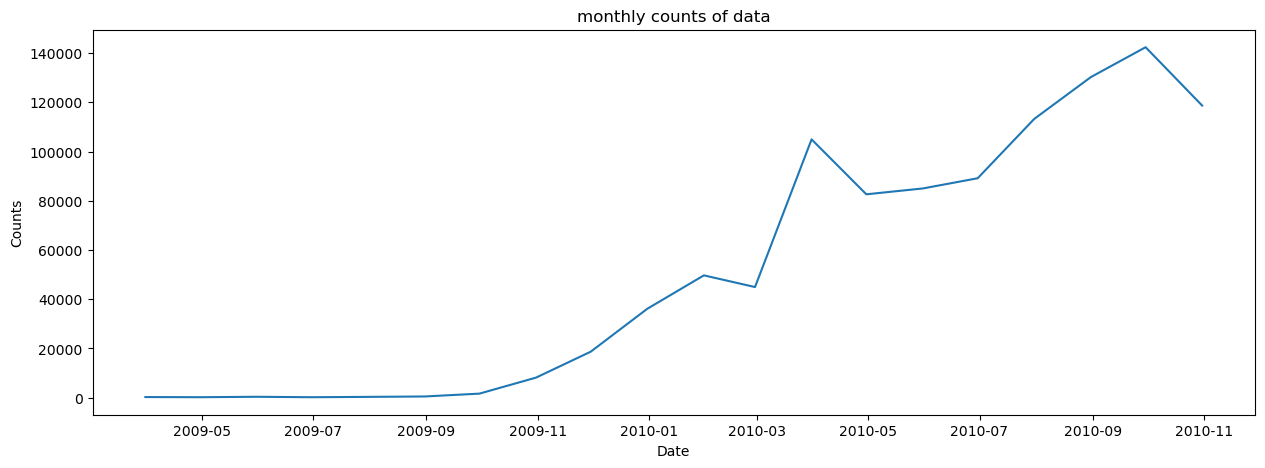

In [13]:
import matplotlib.pyplot as plt

# 월별로 집계
monthly_counts = fdf.groupby(pd.Grouper(key='time', freq='M')).size()
print(monthly_counts)
# 그래프 그리기
plt.figure(figsize=(15,5))
plt.plot(monthly_counts.index, monthly_counts.values)

# 그래프 옵션 설정
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('monthly counts of data')

# 그래프 출력
plt.show()

In [47]:
# 전처리 된 데이터 저장
fdf.to_csv(SAVE_PATH + "\\preprocessed_data.csv", index=False)

## 시나리오1, 유저와 아이템 모두 증가. (increase)

In [48]:
fdf = pd.read_csv(os.path.join(SAVE_PATH, "preprocessed_data.csv"))
fdf

,user,item,time
0,343,8975,2009-03-08 02:33:06+00:00
1,5258,9294,2009-03-08 22:31:05+00:00
2,3973,9225,2009-03-13 04:45:18+00:00
3,5254,61841,2009-03-13 17:38:56+00:00
4,5254,9309,2009-03-13 17:49:18+00:00
...,...,...,...
1027459,191672,1373815,2010-10-23 01:15:38+00:00
1027460,180989,10745,2010-10-23 01:18:24+00:00
1027461,97716,23163,2010-10-23 02:04:43+00:00
1027462,97716,68496,2010-10-23 02:05:35+00:00


In [49]:
# 경로 설정
INCREASE_PATH = os.path.join(SAVE_PATH, "increase\\")
INCREASE_PATH

'C:\\tech\\Study\\KCC\\dataset\\Gowalla\\increase\\'

In [50]:
# base block 설정
print(fdf.shape)
pivot = len(fdf) * BASE_DATA_RATIO // 10
print(pivot)
fdf[:pivot].to_csv(INCREASE_PATH + "inc0.csv", index=False)

(1027464, 3)
719224


In [51]:
remain = fdf[pivot:]
print(remain.shape)
len_per_block = remain.shape[0] // INC_STEP
print(len_per_block * INC_STEP)
remain

(308240, 3)
308240


,user,item,time
719224,36423,10122,2010-08-21 00:18:15+00:00
719225,25144,112486,2010-08-21 00:18:17+00:00
719226,2356,14628,2010-08-21 00:18:18+00:00
719227,53079,64135,2010-08-21 00:18:20+00:00
719228,12777,14470,2010-08-21 00:18:43+00:00
...,...,...,...
1027459,191672,1373815,2010-10-23 01:15:38+00:00
1027460,180989,10745,2010-10-23 01:18:24+00:00
1027461,97716,23163,2010-10-23 02:04:43+00:00
1027462,97716,68496,2010-10-23 02:05:35+00:00


In [52]:
start = 0
inc_block = []
for i in range(INC_STEP):
    if i != INC_STEP - 1:
        inc_block.append(remain[start:start + len_per_block])
    else:
        inc_block.append(remain[start:])
    start += len_per_block
    print(f"Inc{i} Block Size : {len(inc_block[i])}")
    inc_block[i].to_csv(INCREASE_PATH + f"inc{i + 1}.csv", index=False)

Inc0 Block Size : 61648
Inc1 Block Size : 61648
Inc2 Block Size : 61648
Inc3 Block Size : 61648
Inc4 Block Size : 61648


## 시나리오2, 유저와 아이템 모두 고정. (fixed)

In [53]:
fdf = pd.read_csv(os.path.join(SAVE_PATH, "preprocessed_data.csv"))

In [54]:
FIXED_PATH = os.path.join(SAVE_PATH, "fixed\\")
FIXED_PATH

'C:\\tech\\Study\\KCC\\dataset\\Gowalla\\fixed\\'

In [55]:
# base block 설정
print(fdf.shape)
pivot = len(fdf) * BASE_DATA_RATIO // 10
print(pivot)
fdf[:pivot].to_csv(FIXED_PATH + "inc0.csv", index=False)

(1027464, 3)
719224


In [56]:
# base block에 있는 unique한 user, item index 추출
unique_user = fdf[:pivot]['user'].unique()
unique_item = fdf[:pivot]['item'].unique()
fdf[:pivot].shape, unique_user.shape, unique_item.shape

((719224, 3), (25728,), (40572,))

In [57]:
# remain block에서 unique user/item에 해당하는 데이터만 추출
remain = fdf[pivot:]
print("unique 추출 전 ", remain.shape)
fixed_df = remain[remain['user'].isin(unique_user) & remain['item'].isin(unique_item)]
print("unique 추출 후 ", fixed_df.shape)
fixed_df

unique 추출 전  (308240, 3)
unique 추출 후  (210882, 3)


,user,item,time
719224,36423,10122,2010-08-21 00:18:15+00:00
719225,25144,112486,2010-08-21 00:18:17+00:00
719226,2356,14628,2010-08-21 00:18:18+00:00
719227,53079,64135,2010-08-21 00:18:20+00:00
719228,12777,14470,2010-08-21 00:18:43+00:00
...,...,...,...
1027440,79478,82498,2010-10-22 20:44:19+00:00
1027454,149125,85454,2010-10-22 23:14:22+00:00
1027458,89231,10745,2010-10-23 01:01:04+00:00
1027459,191672,1373815,2010-10-23 01:15:38+00:00


In [58]:
len_per_block = fixed_df.shape[0] // INC_STEP
start = 0
inc_block = []
for i in range(INC_STEP):
    if i != INC_STEP - 1:
        inc_block.append(fixed_df[start:start + len_per_block])
    else:
        inc_block.append(fixed_df[start:])
    start += len_per_block
    print(f"Inc{i + 1} Block Size : {len(inc_block[i])}")
    inc_block[i].to_csv(INCREASE_PATH + f"inc{i + 1}.csv", index=False)

Inc1 Block Size : 42176
Inc2 Block Size : 42176
Inc3 Block Size : 42176
Inc4 Block Size : 42176
Inc5 Block Size : 42178


## 시나리오3, 유저만 증가 (user)

In [59]:
fdf = pd.read_csv(os.path.join(SAVE_PATH, "preprocessed_data.csv"))

In [60]:
USER_PATH = os.path.join(SAVE_PATH, "user\\")
USER_PATH

'C:\\tech\\Study\\KCC\\dataset\\Gowalla\\user\\'

In [61]:
# base block 설정
print(fdf.shape)
pivot = len(fdf) * BASE_DATA_RATIO // 10
print(pivot)
fdf[:pivot].to_csv(USER_PATH + "inc0.csv", index=False)

(1027464, 3)
719224


In [62]:
# base block에 있는 unique한 user index 추출
unique_user = fdf[:pivot]['user'].unique()
fdf[:pivot].shape, unique_user.shape

((719224, 3), (25728,))

In [63]:
# base block에 존재하는 unique한 user index를 제외하여 remain을 형성하자.
remain = fdf[pivot:]
print("전 ", remain.shape)
new_user_remain_df = remain[~remain['user'].isin(unique_user)]
print("후 ", new_user_remain_df.shape)
new_user_remain_df

전  (308240, 3)
후  (91119, 3)


,user,item,time
719264,50452,192446,2010-08-21 00:24:58+00:00
719281,17829,1132814,2010-08-21 00:26:33+00:00
719285,116786,125090,2010-08-21 00:27:17+00:00
719341,2275,33735,2010-08-21 00:36:59+00:00
719343,2275,33791,2010-08-21 00:37:08+00:00
...,...,...,...
1027456,98916,212719,2010-10-22 23:33:04+00:00
1027457,97731,154518,2010-10-22 23:51:12+00:00
1027461,97716,23163,2010-10-23 02:04:43+00:00
1027462,97716,68496,2010-10-23 02:05:35+00:00


In [64]:
len_per_block = new_user_remain_df.shape[0] // INC_STEP
start = 0
inc_block = []
for i in range(INC_STEP):
    if i != INC_STEP - 1:
        inc_block.append(new_user_remain_df[start:start + len_per_block])
    else:
        inc_block.append(new_user_remain_df[start:])
    start += len_per_block
    print(f"Inc{i + 1} Block Size : {len(inc_block[i])}")
    inc_block[i].to_csv(INCREASE_PATH + f"inc{i + 1}.csv", index=False)

Inc1 Block Size : 18223
Inc2 Block Size : 18223
Inc3 Block Size : 18223
Inc4 Block Size : 18223
Inc5 Block Size : 18227


## 시나리오4, 아이템만 증가. (item)

In [65]:
fdf = pd.read_csv(os.path.join(SAVE_PATH, "preprocessed_data.csv"))

In [66]:
ITEM_PATH = os.path.join(SAVE_PATH, "item\\")
ITEM_PATH

'C:\\tech\\Study\\KCC\\dataset\\Gowalla\\item\\'

In [67]:
# base block 설정
print(fdf.shape)
pivot = len(fdf) * BASE_DATA_RATIO // 10
print(pivot)
fdf[:pivot].to_csv(USER_PATH + "inc0.csv", index=False)

(1027464, 3)
719224


In [68]:
# base block에 있는 unique한 item index 추출
unique_item = fdf[:pivot]['item'].unique()
fdf[:pivot].shape, unique_item.shape

((719224, 3), (40572,))

In [69]:
# base block에 존재하는 unique한 user index를 제외하여 remain을 형성하자.
remain = fdf[pivot:]
print("전 ", remain.shape)
new_item_remain_df = remain[~remain['item'].isin(unique_item)]
print("후 ", new_item_remain_df.shape)
new_item_remain_df

전  (308240, 3)
후  (9102, 3)


,user,item,time
719559,2305,2117253,2010-08-21 01:18:10+00:00
719823,65232,2158671,2010-08-21 02:11:27+00:00
720221,1754,2117253,2010-08-21 03:51:16+00:00
720308,38539,1571209,2010-08-21 04:20:14+00:00
720367,108651,1949715,2010-08-21 04:37:59+00:00
...,...,...,...
1027178,718,3098978,2010-10-22 03:54:09+00:00
1027265,165897,4991484,2010-10-22 10:33:27+00:00
1027285,186489,5389753,2010-10-22 12:21:55+00:00
1027302,182660,5474349,2010-10-22 14:03:06+00:00


In [70]:
len_per_block = new_item_remain_df.shape[0] // INC_STEP
start = 0
inc_block = []
for i in range(INC_STEP):
    if i != INC_STEP - 1:
        inc_block.append(new_item_remain_df[start:start + len_per_block])
    else:
        inc_block.append(new_item_remain_df[start:])
    start += len_per_block
    print(f"Inc{i + 1} Block Size : {len(inc_block[i])}")
    inc_block[i].to_csv(INCREASE_PATH + f"inc{i + 1}.csv", index=False)

Inc1 Block Size : 1820
Inc2 Block Size : 1820
Inc3 Block Size : 1820
Inc4 Block Size : 1820
Inc5 Block Size : 1822


In [83]:
import pandas as pd

df = pd.read_csv("./dataset/Gowalla/increase/inc0.csv")
df[df['user'] == 7142]

,user,item,time
452166,7142,374722,2010-06-07 14:24:49+00:00
501691,7142,34914,2010-06-24 09:45:23+00:00
533263,7142,105228,2010-07-03 22:43:45+00:00
698512,7142,127183,2010-08-15 14:39:15+00:00
713851,7142,61161,2010-08-19 20:30:19+00:00
